In [ ]:
# prompt: Mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: upload my dataset from drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'your_file.csv' with the actual name of your file
# and the full path to your file in your Google Drive
file_path = '/content/drive/MyDrive/AIR POLUTION/AIR-QUALITY.zip'

try:
  df = pd.read_csv(file_path)
  print("Dataset loaded successfully!")
  print(df.head()) # Display the first few rows of the dataframe
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully!
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.shape




(5000, 10)

In [ ]:
# prompt: Use descriptive statistics to get a high-level view of each variable in df

# Display basic descriptive statistics for each numerical variable
print(df.describe())

# Display descriptive statistics for all variables (including categorical)
print(df.describe(include='all'))

# Get the data types of each column
print(df.dtypes)

# Get the number of unique values in each column
print(df.nunique())

# Identify missing values
print(df.isnull().sum())

       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%

In [ ]:
# prompt:  Summarize categorical variables with counts and proportions on df

# Assuming df is already loaded as in your previous code

for col in df.select_dtypes(include=['object', 'category']): #select only categorical columns
  print(f"Summary for '{col}':")
  print(df[col].value_counts())
  print(df[col].value_counts(normalize=True) * 100) # proportions in percentage
  print("-" * 20)

Summary for 'Air Quality':
Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64
Air Quality
Good         40.0
Moderate     30.0
Poor         20.0
Hazardous    10.0
Name: proportion, dtype: float64
--------------------


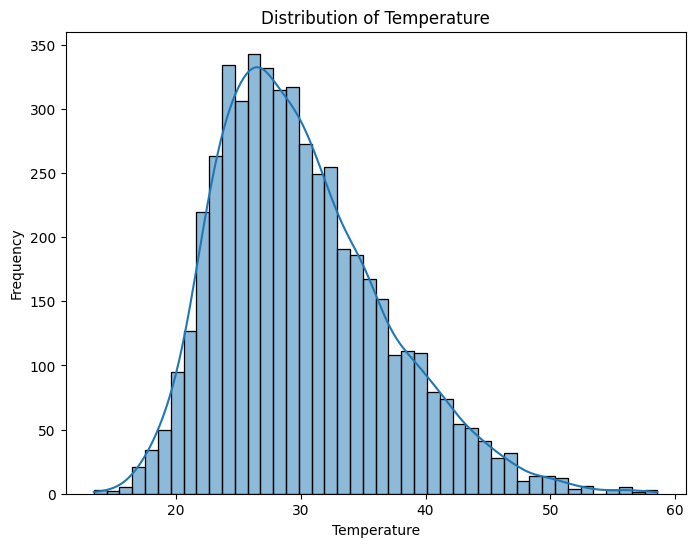

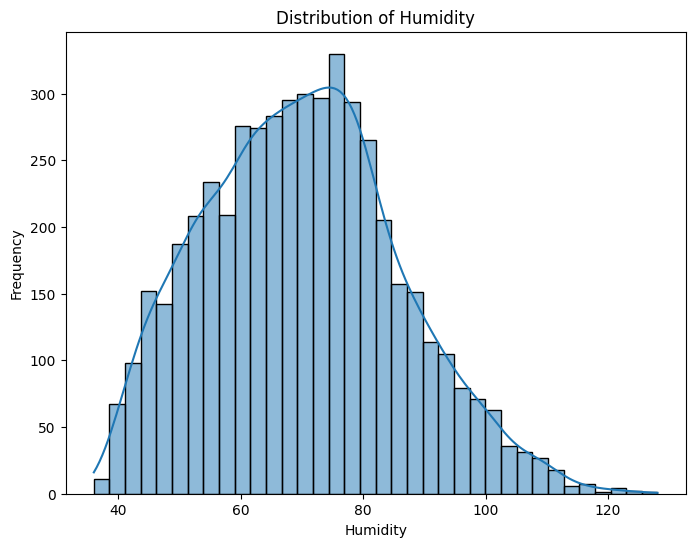

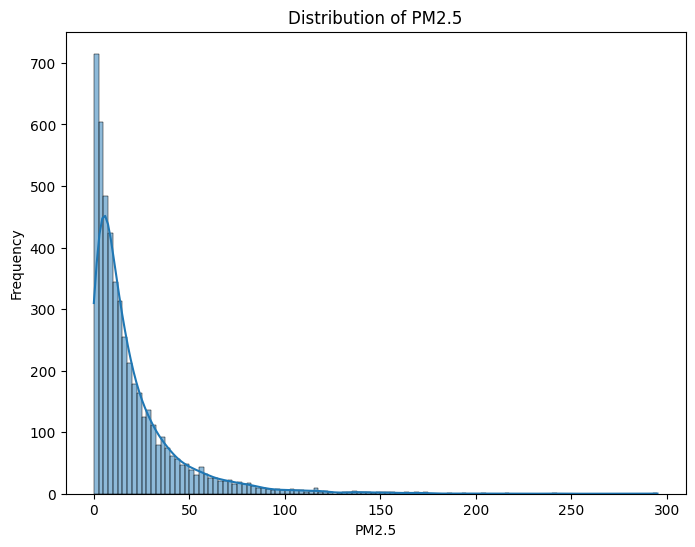

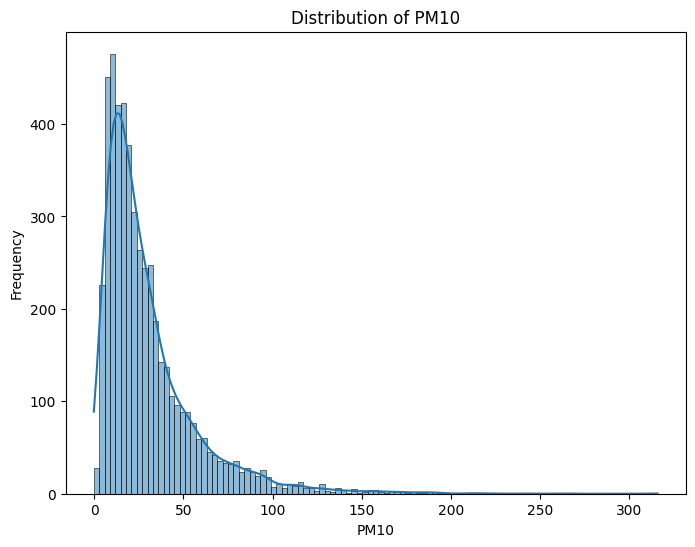

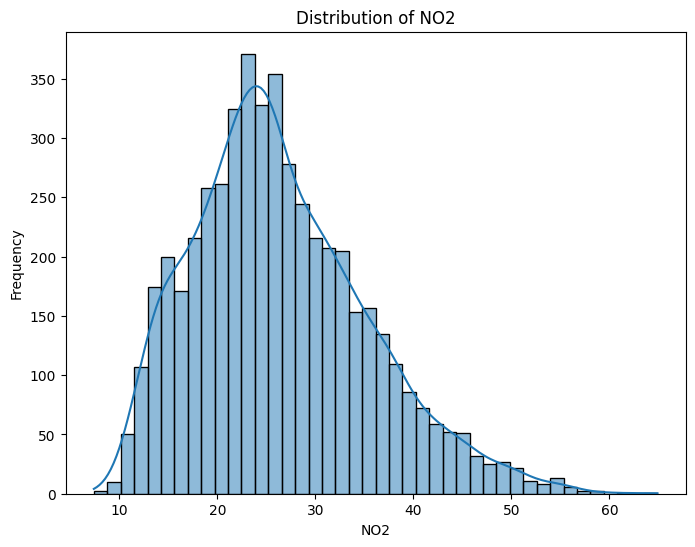

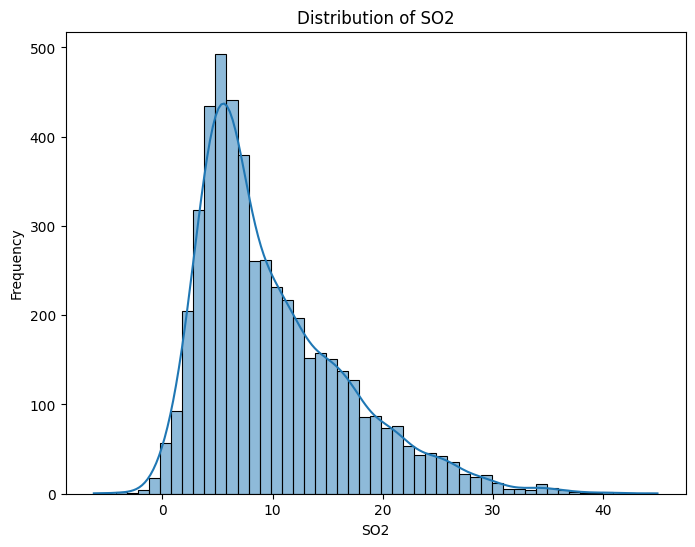

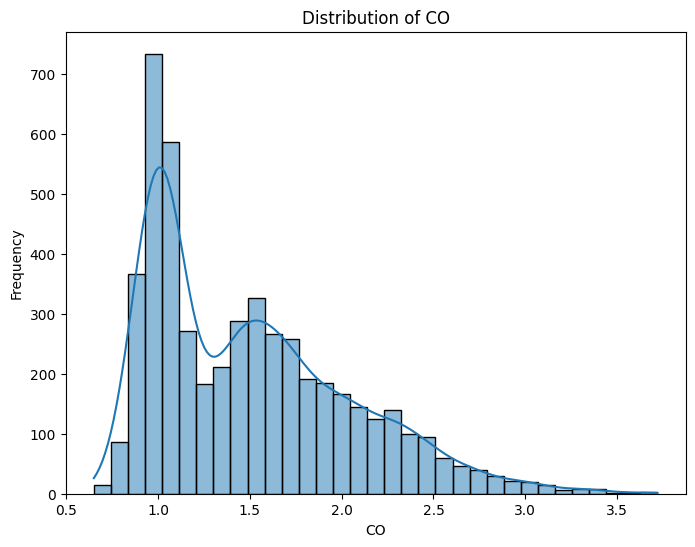

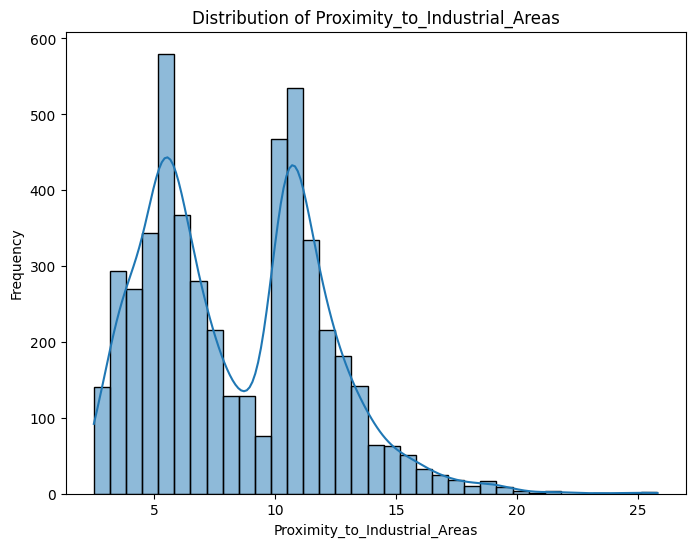

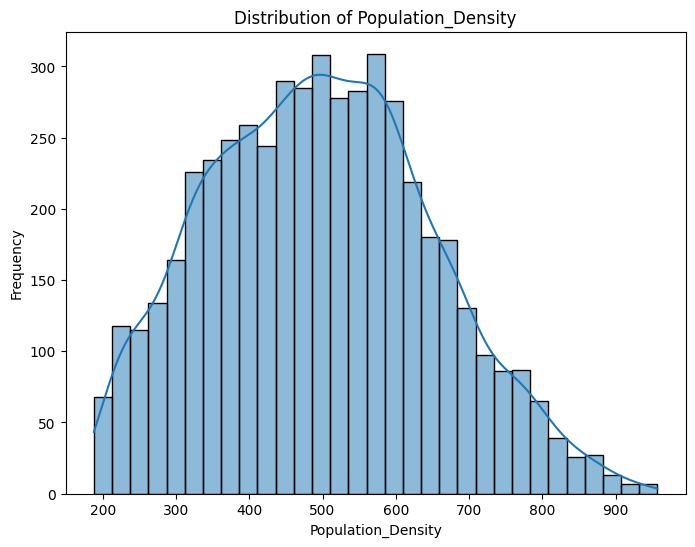

In [ ]:
# prompt: Graphical Analysis:    Visualize data distributions with histograms on df , show diffferent of each attribute on different graph

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in your previous code

# Iterate through numerical columns and create histograms
for column in df.select_dtypes(include=['number']):  # Select only numerical columns
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(df[column], kde=True)  # Use seaborn for better-looking plots, include KDE
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

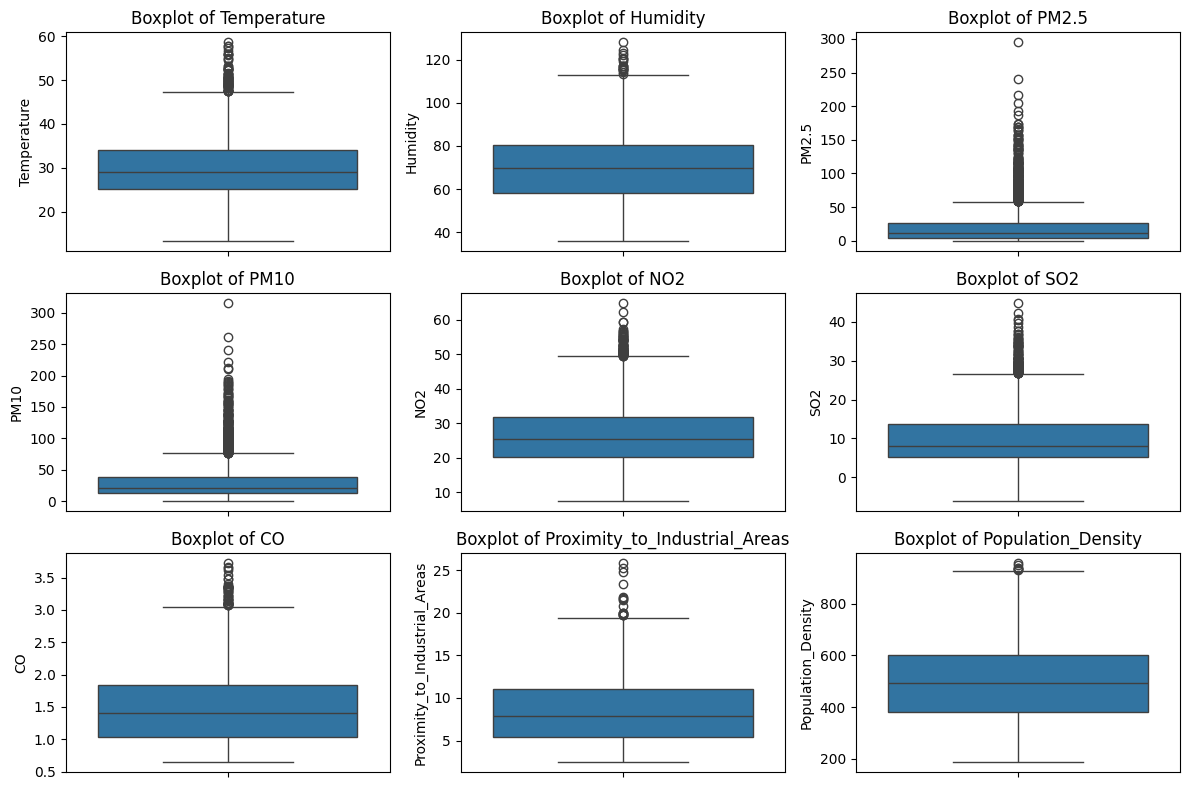

In [ ]:
# prompt: Graphical Analysis:    Visualize data distributions with boxplots on df

# Assuming df is already loaded as in your previous code

# Create boxplots for numerical features
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
for i, col in enumerate(df.select_dtypes(include=['number'])):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot grid if needed
    sns.boxplot(y=df[col])  # Create a boxplot for the current column
    plt.title(f'Boxplot of {col}')
    plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

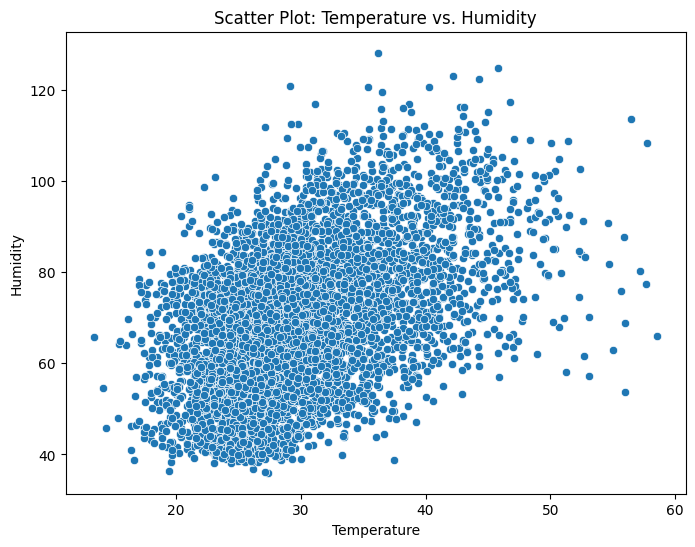

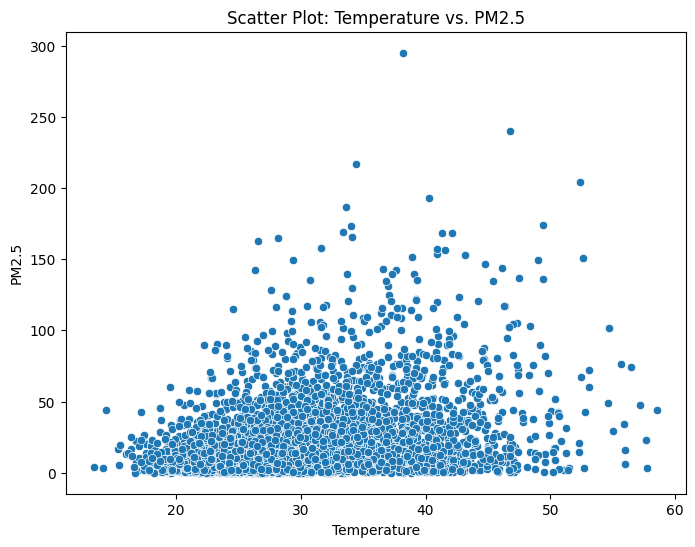

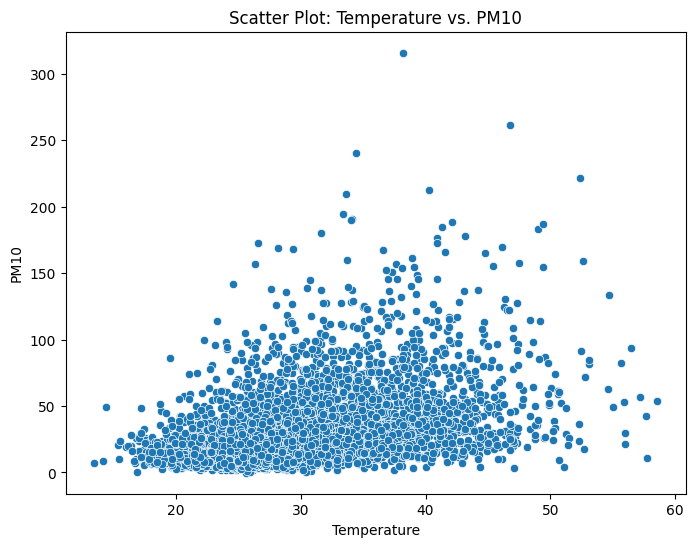

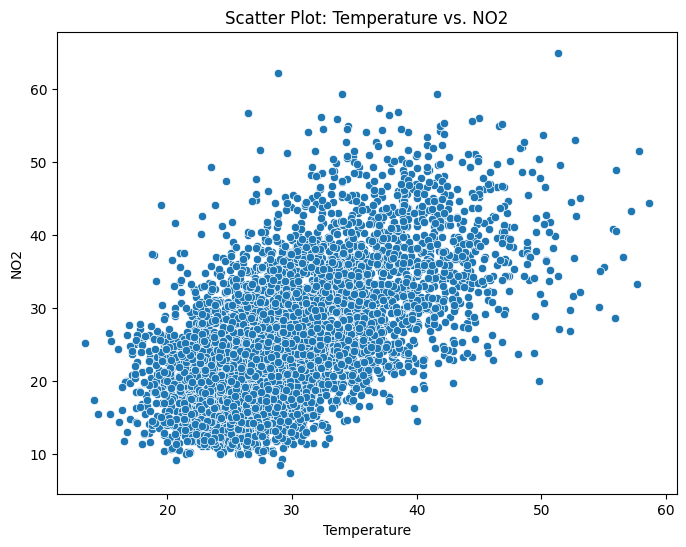

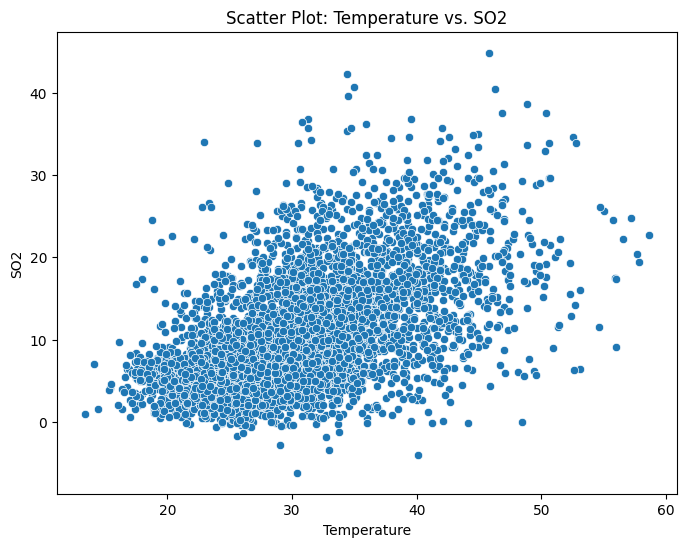

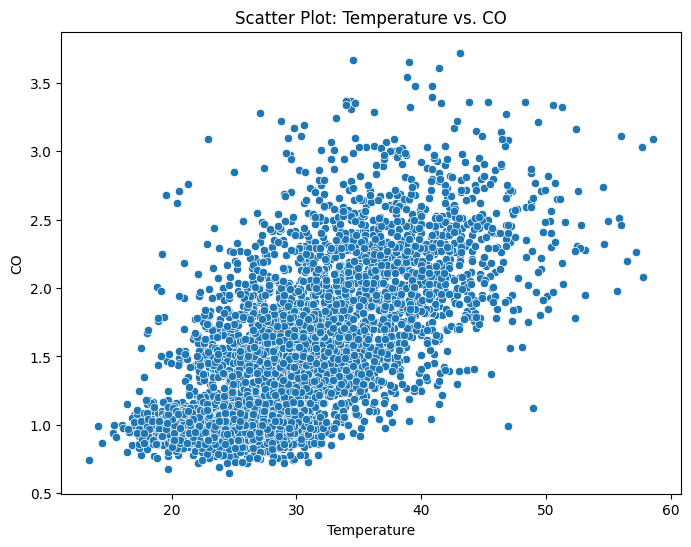

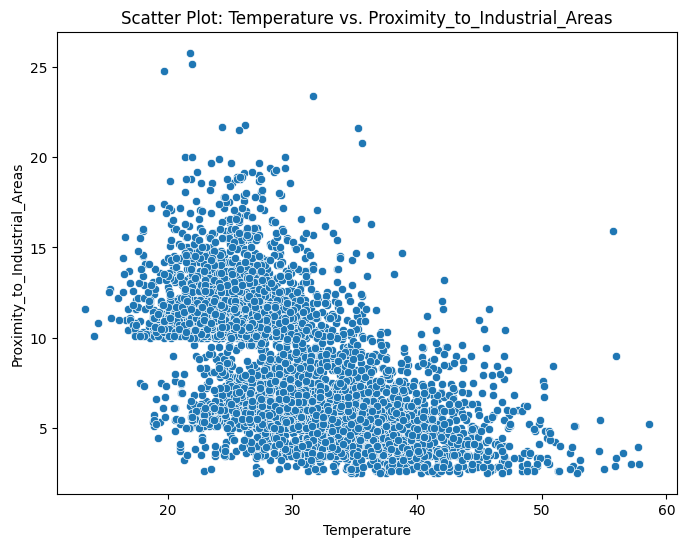

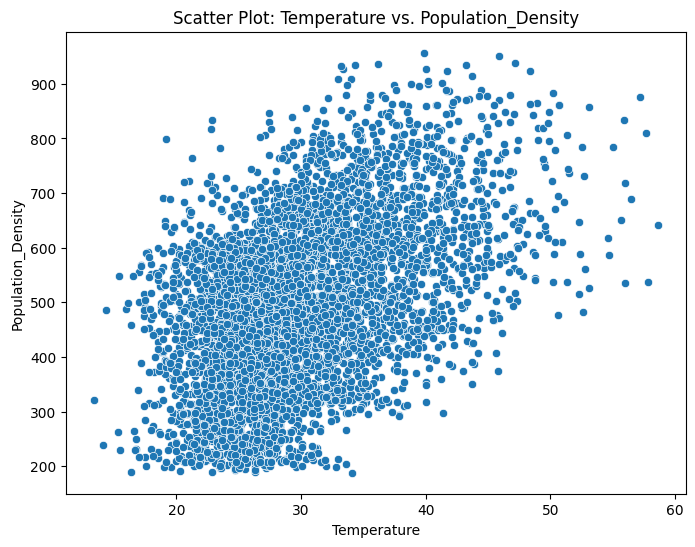

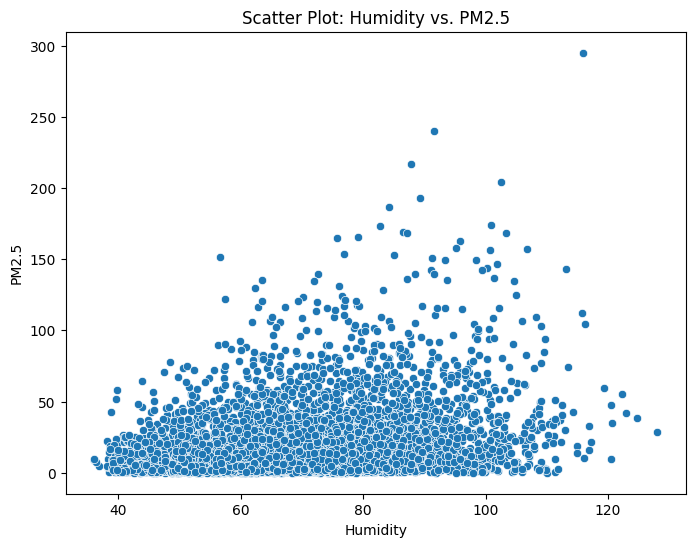

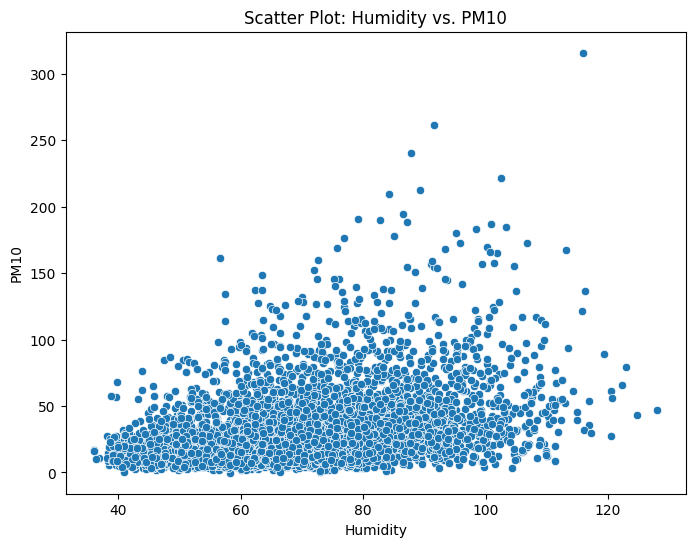

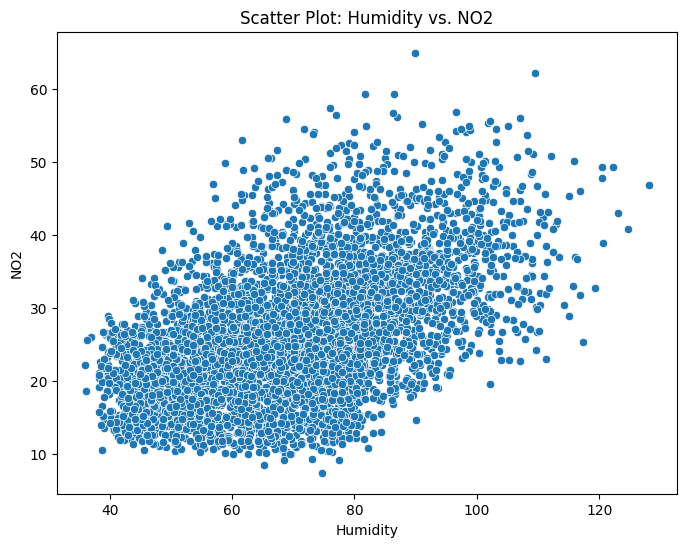

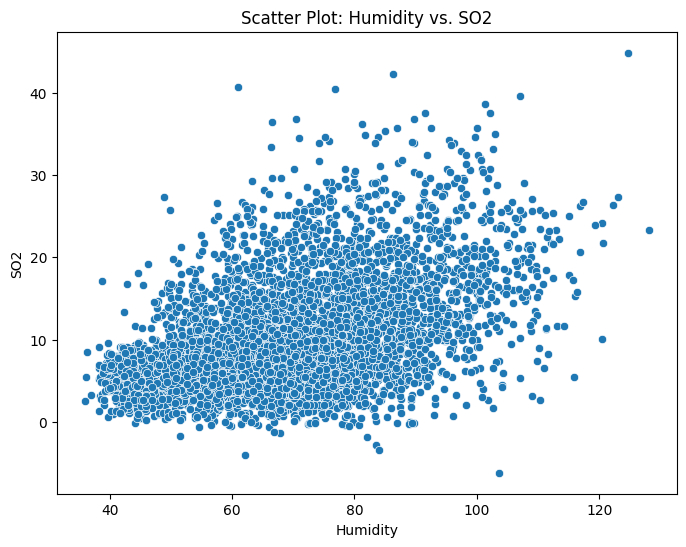

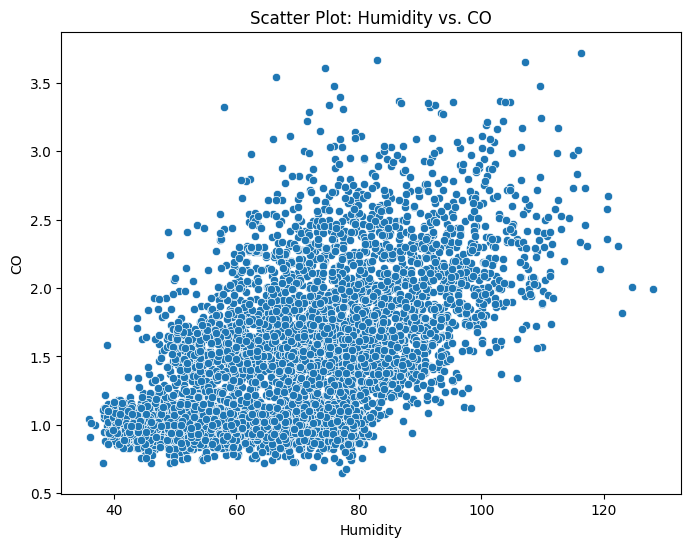

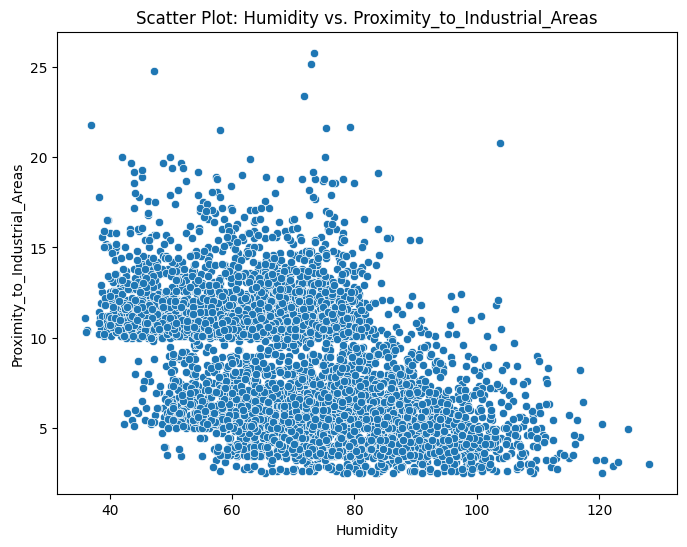

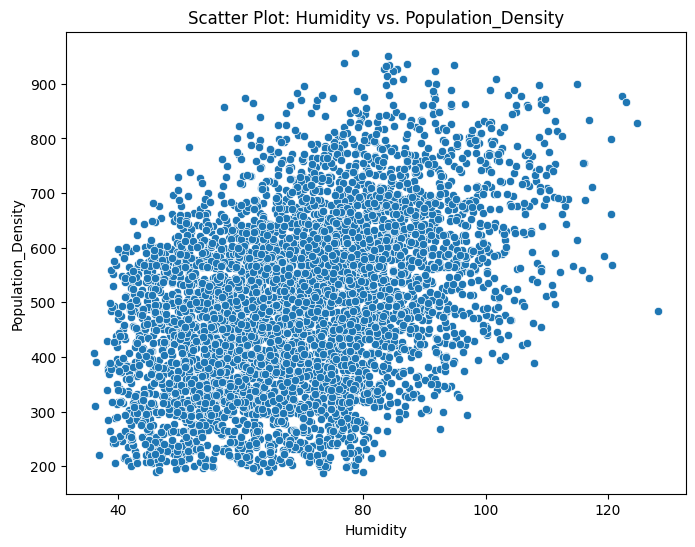

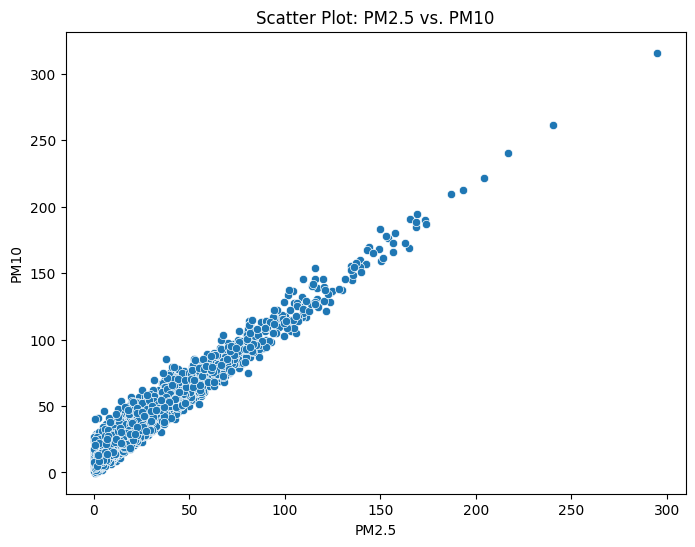

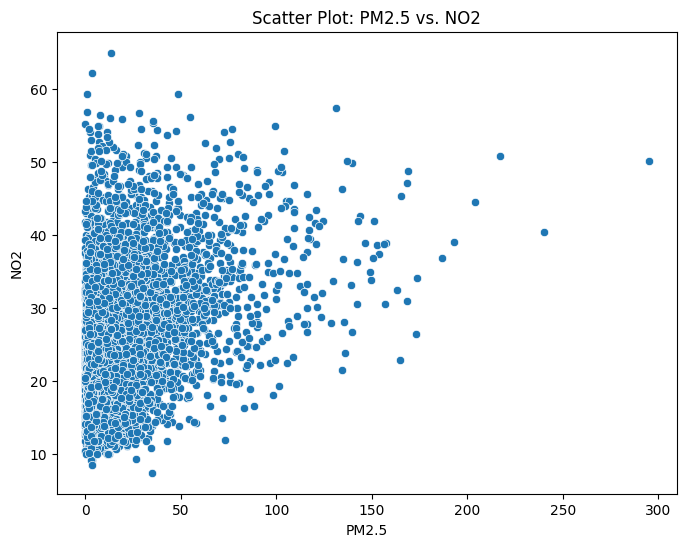

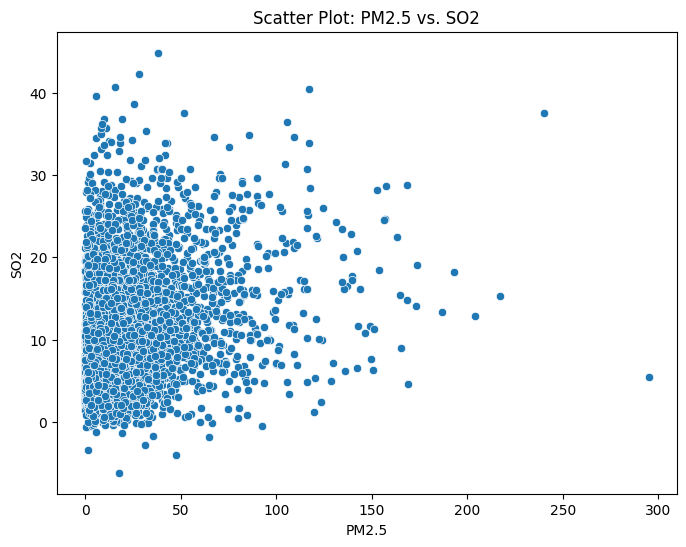

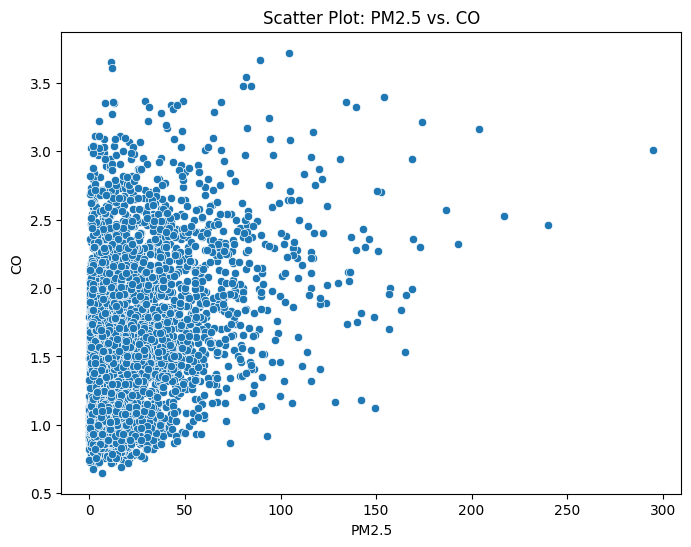

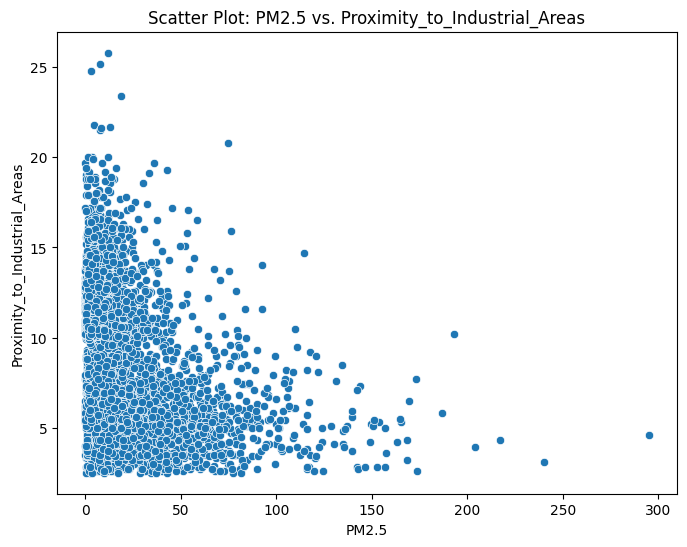

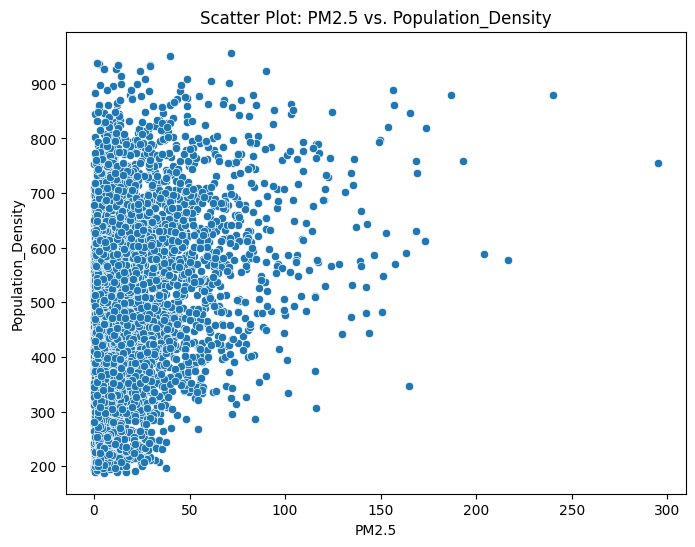

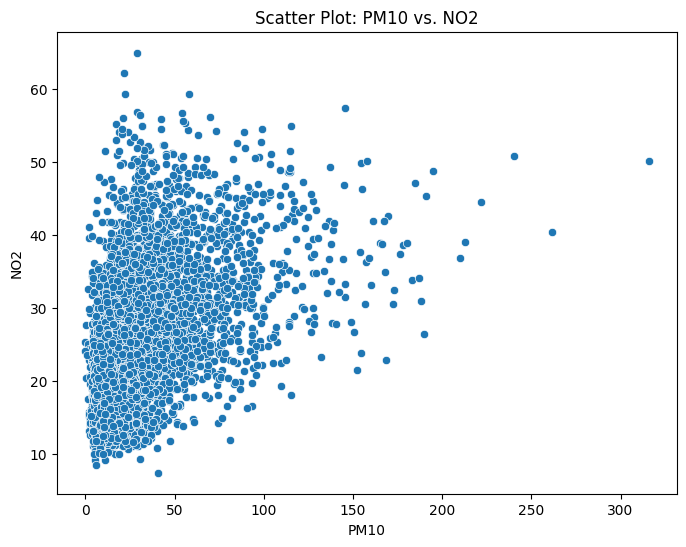

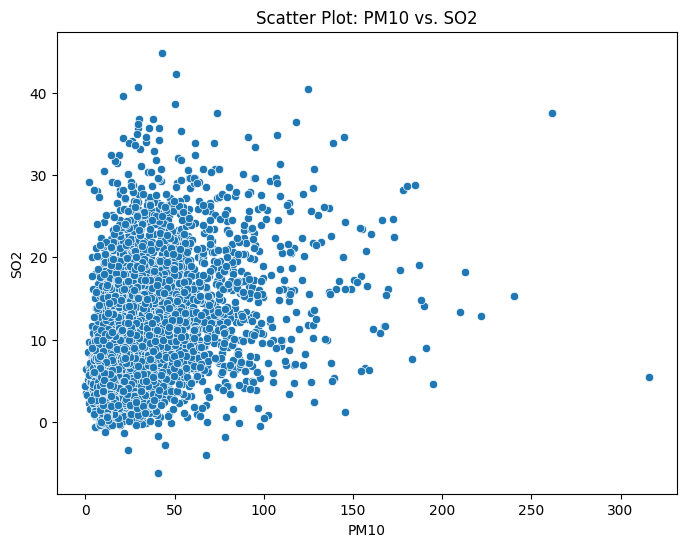

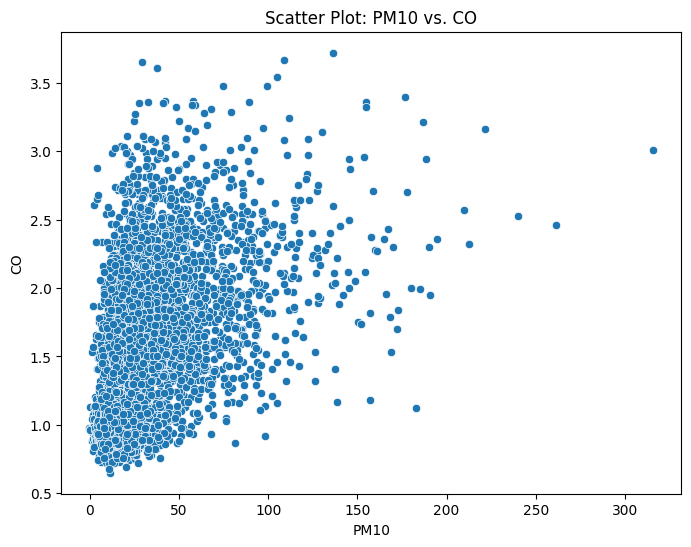

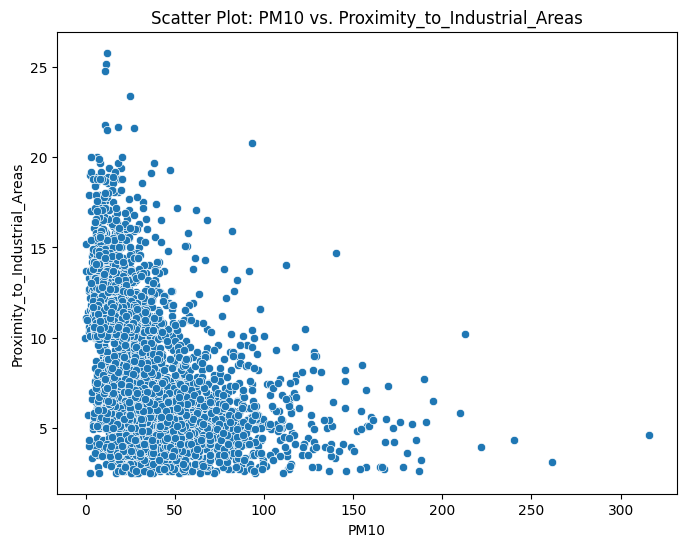

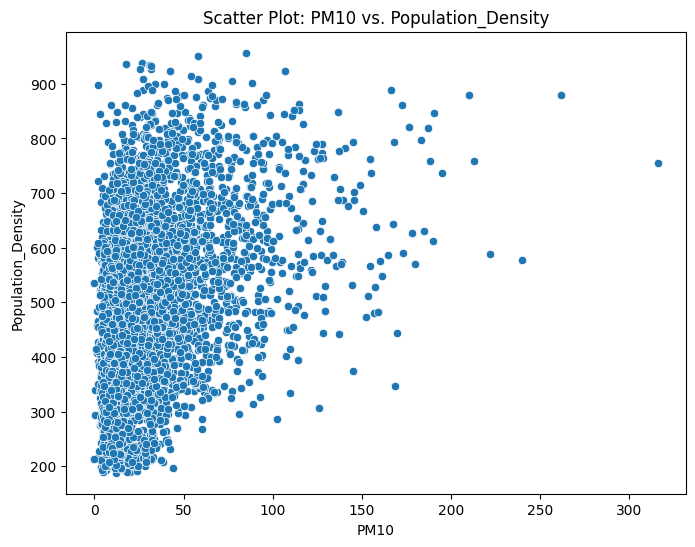

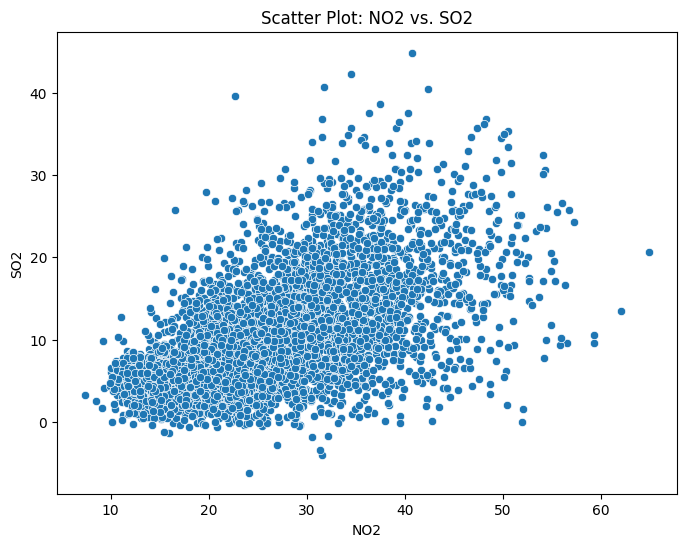

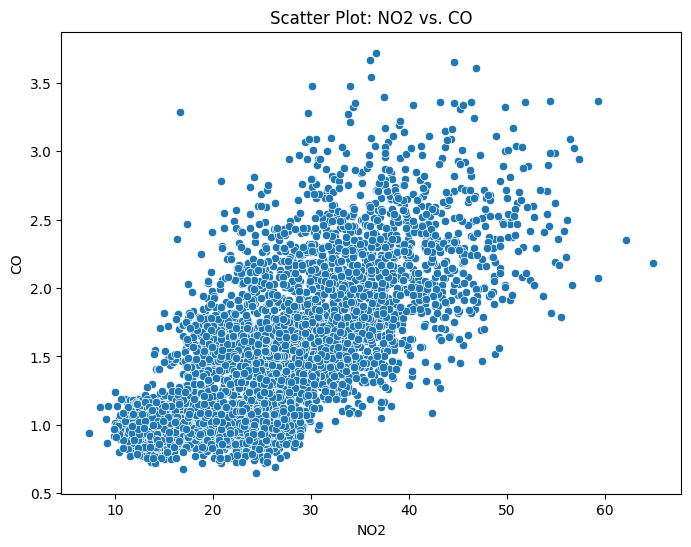

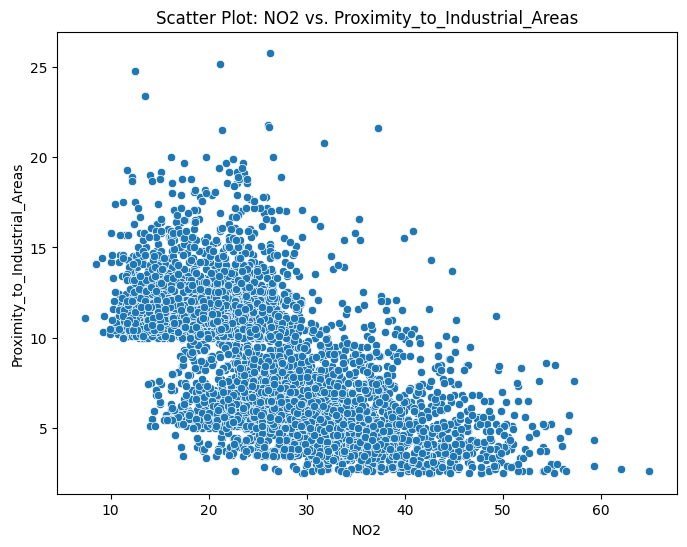

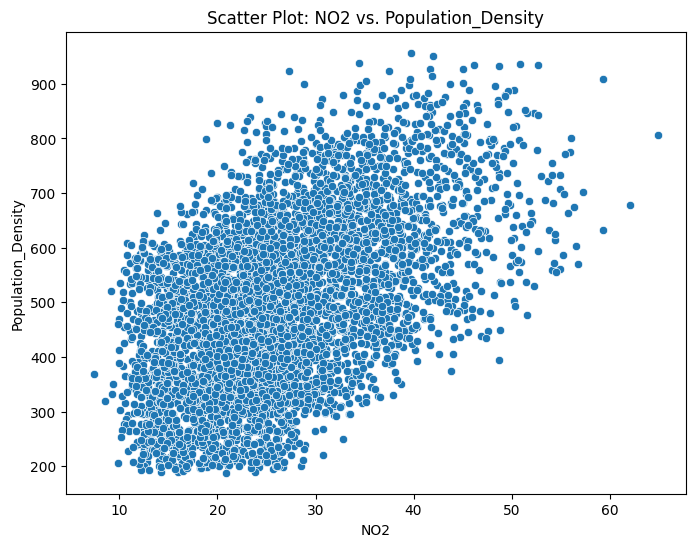

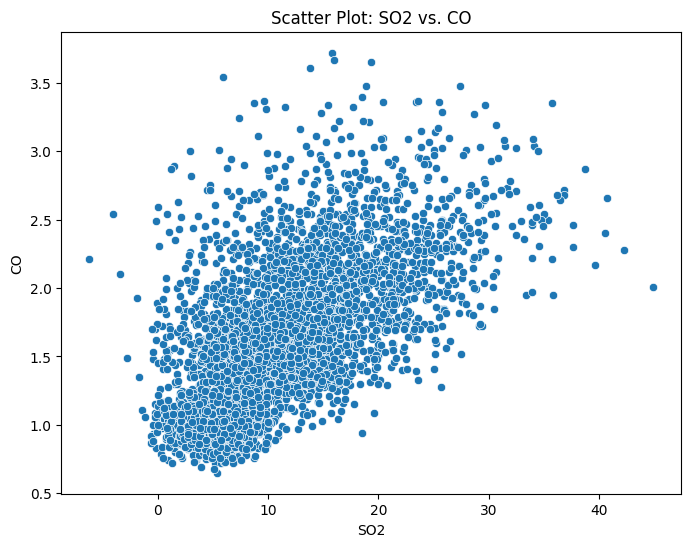

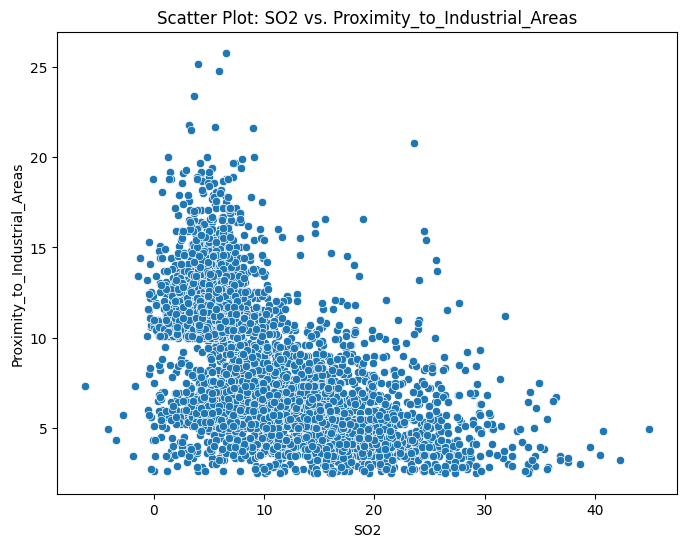

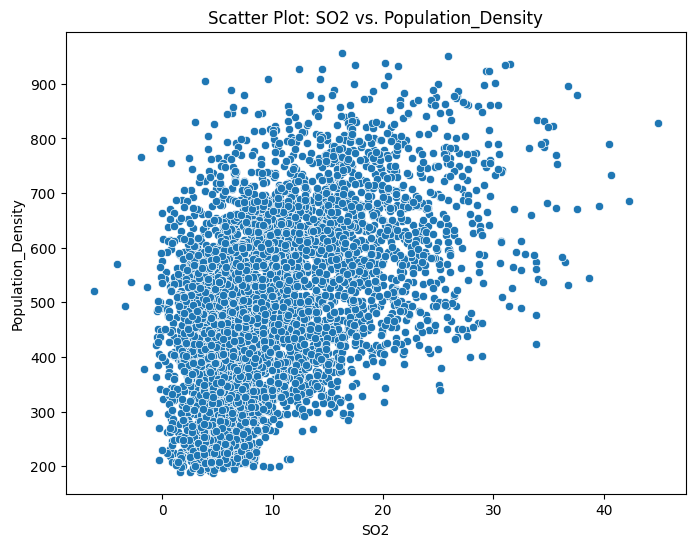

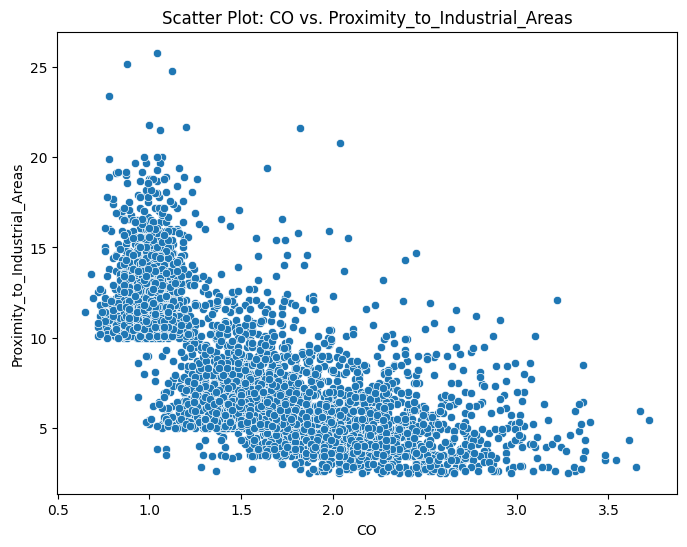

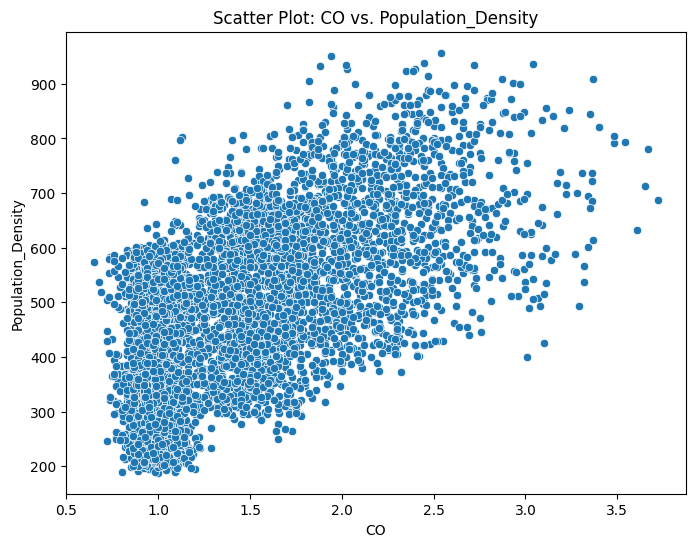

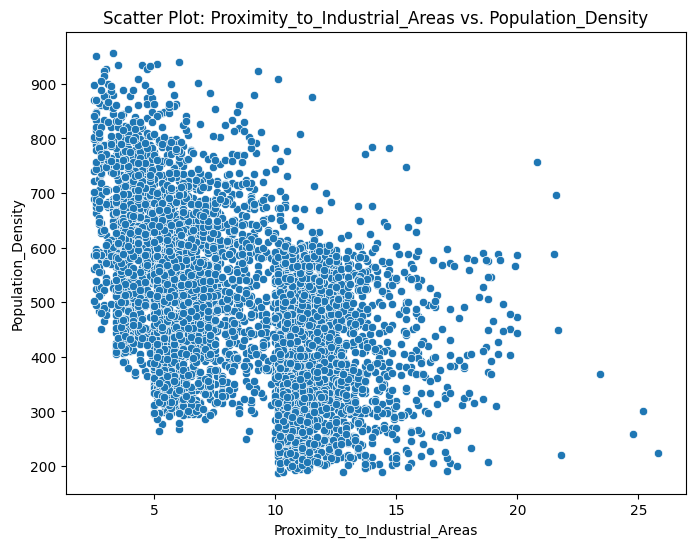

In [ ]:
# prompt: Use scatter plots to examine relationships between variables on df

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in your previous code

# Select numerical columns for scatter plot analysis
numerical_cols = df.select_dtypes(include=['number']).columns

# Create scatter plots for pairs of numerical variables
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[numerical_cols[i]], y=df[numerical_cols[j]])
        plt.title(f'Scatter Plot: {numerical_cols[i]} vs. {numerical_cols[j]}')
        plt.xlabel(numerical_cols[i])
        plt.ylabel(numerical_cols[j])
        plt.show()

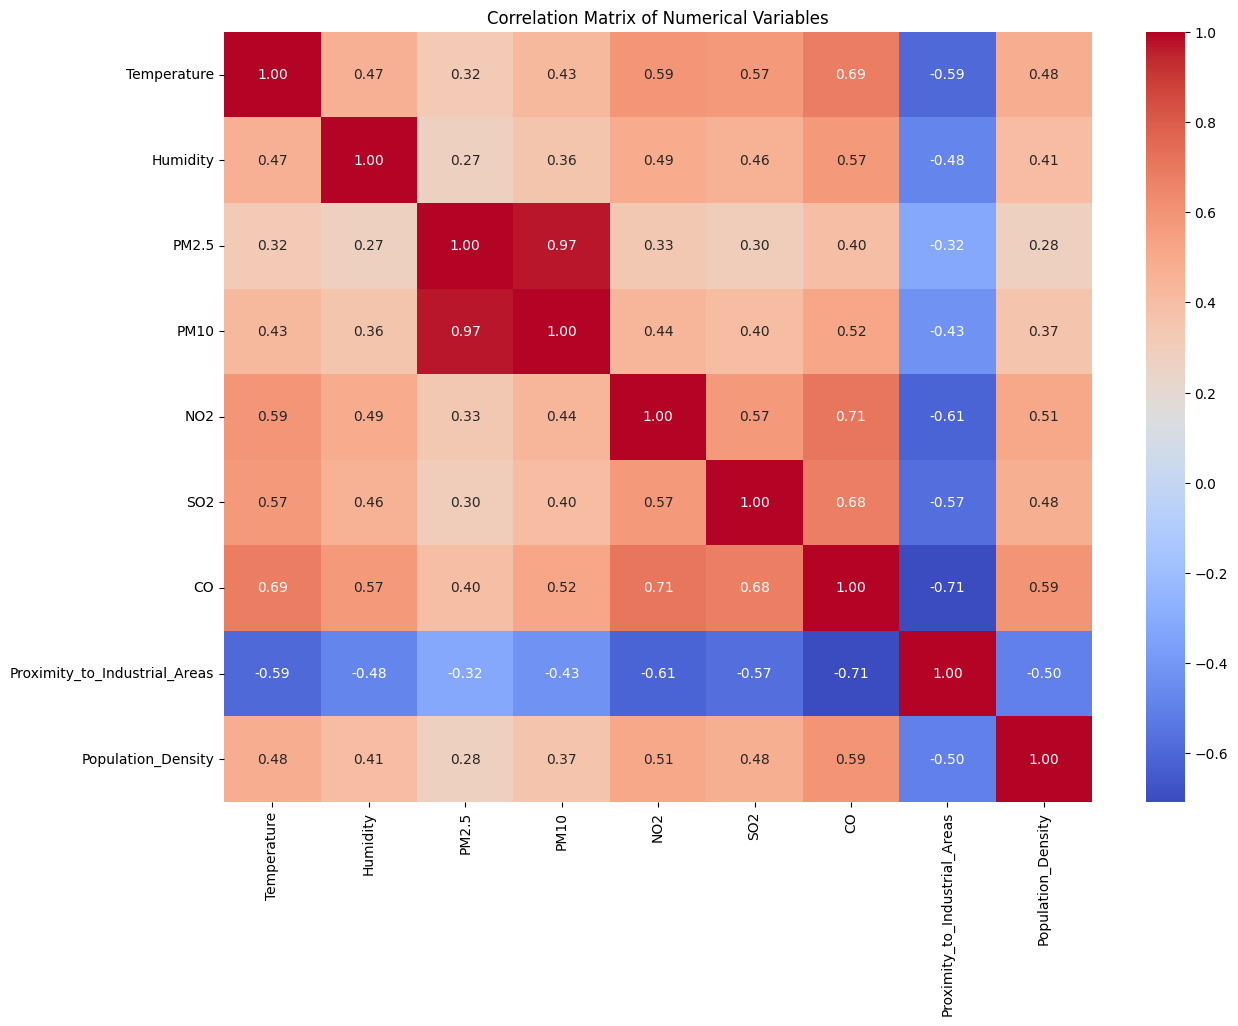

In [ ]:
# prompt: Use heatmaps to examine relationships between variables on df

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it's already loaded

# Select numerical columns for the heatmap
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(14, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

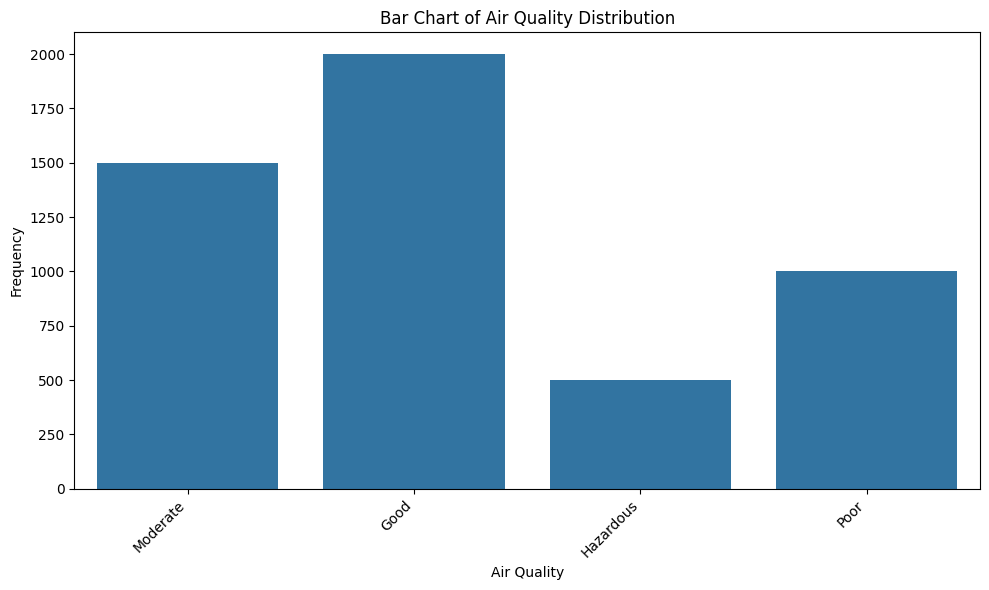

In [ ]:
# prompt: Plot bar charts for categorical data distribution on df

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in your previous code

for col in df.select_dtypes(include=['object', 'category']):
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.countplot(x=col, data=df)  # Use countplot for categorical data
    plt.title(f'Bar Chart of {col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
    plt.tight_layout() # Adjust subplot params for a tight layout
    plt.show()

In [ ]:
# prompt: apply outliers on df

import pandas as pd

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage (assuming 'df' is your DataFrame and 'CO' is a column with outliers):
# Replace 'CO' with the actual column name you want to process
df_no_outliers = remove_outliers_iqr(df, 'CO')

# Display the DataFrame with outliers removed
df_no_outliers

Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
...           ...       ...    ...    ...   ...   ...   ...   
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                               6.3                 319    Moderate  
1                               6.0                 611    Moderate  
2                               5.2                 619    Moderate  
3                              11.1                 551        Good  
4                              12.7                 303        Good  
...                             ...                 ...         ...  
4995                            2.8                 765   Hazardous  
4996                            5.7                 709    Moderate  
4997                            9.6                 379    Moderate  
4998                           11.6                 241        Good  
4999                            8.3                 461    Moderate  

[4955 rows x 10 columns]

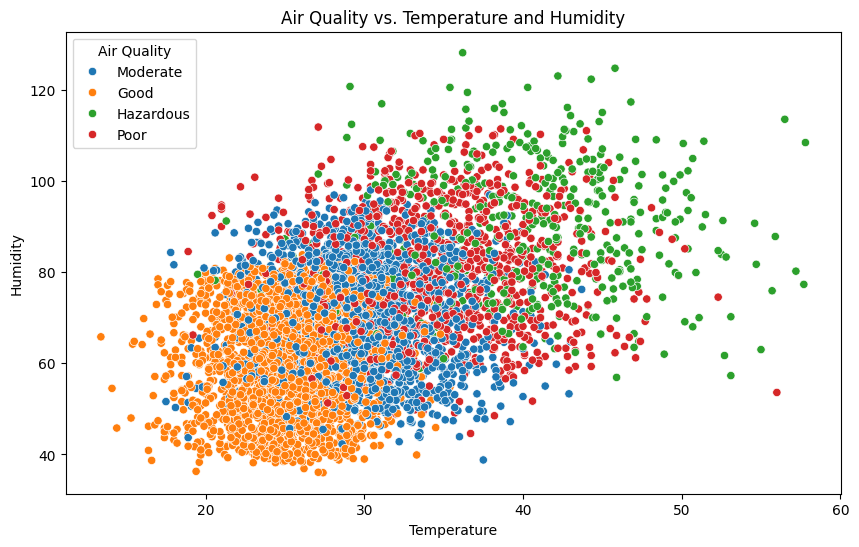

In [ ]:
# @title Air Quality vs. Temperature and Humidity

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='Temperature', y='Humidity', hue='Air Quality')
plt.title('Air Quality vs. Temperature and Humidity')
plt.xlabel('Temperature')
_ = plt.ylabel('Humidity')

In [ ]:
# prompt: Handle missing data on df

# Assuming df is already loaded as in your previous code

# Method 1: Removing rows with missing values
df_dropped = df.dropna()

# Method 2: Filling missing values with the mean (for numerical columns)
numerical_cols = df.select_dtypes(include=['number']).columns
df_filled_mean = df.copy()
for col in numerical_cols:
    df_filled_mean[col] = df_filled_mean[col].fillna(df_filled_mean[col].mean())

# Method 3: Filling missing values with the median (for numerical columns)
df_filled_median = df.copy()
for col in numerical_cols:
    df_filled_median[col] = df_filled_median[col].fillna(df_filled_median[col].median())


# Method 4: Filling missing values with a specific value (e.g., 0)
df_filled_zero = df.fillna(0)

# Method 5: Filling missing values with the most frequent value (mode) for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_filled_mode = df.copy()
for col in categorical_cols:
    df_filled_mode[col] = df_filled_mode[col].fillna(df_filled_mode[col].mode()[0]) #mode() returns a series


# Method 6: Filling missing values using forward fill or backward fill
df_ffill = df.fillna(method='ffill') #forward fill
df_bfill = df.fillna(method='bfill') #backward fill

# Method 7: Imputation using scikit-learn's SimpleImputer
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the numerical columns of the DataFrame
df_imputed = df.copy()
df_imputed[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Print the first few rows of the DataFrame after each method to compare
print("Original DataFrame (head):\n", df.head())
print("\nDataFrame with rows containing missing values dropped (head):\n", df_dropped.head())
print("\nDataFrame with missing numerical values filled with the mean (head):\n", df_filled_mean.head())
print("\nDataFrame with missing numerical values filled with the median (head):\n", df_filled_median.head())
print("\nDataFrame with missing values filled with 0 (head):\n", df_filled_zero.head())
print("\nDataFrame with missing categorical values filled with the mode (head):\n", df_filled_mode.head())
print("\nDataFrame with missing values filled using forward fill (head):\n", df_ffill.head())
print("\nDataFrame with missing values filled using backward fill (head):\n", df_bfill.head())
print("\nDataFrame with missing numerical values imputed using SimpleImputer (head):\n", df_imputed.head())

<ipython-input-13-7606cf3ab99c>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill') #forward fill
<ipython-input-13-7606cf3ab99c>:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill') #backward fill


Original DataFrame (head):
    Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  

DataFrame with rows containing missing values dropped (head):
    Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  

In [ ]:
# prompt: Normalize data on df

from sklearn.preprocessing import MinMaxScaler

# Assuming df_imputed is your DataFrame with handled missing values (from previous code)
# Select only numerical features for normalization
numerical_cols = df_imputed.select_dtypes(include=['number']).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the numerical features
df_normalized = df_imputed.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df_imputed[numerical_cols])

# Display the normalized DataFrame
print(df_normalized.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.362832  0.250814  0.017627  0.057278  0.200000  0.301370  0.348534   
1     0.329646  0.429967  0.007797  0.039241  0.406957  0.311155  0.322476   
2     0.214602  0.420195  0.090508  0.107595  0.295652  0.367906  0.319218   
3     0.303097  0.033659  0.020678  0.020570  0.106087  0.225049  0.162866   
4     0.289823  0.376764  0.023390  0.051266  0.252174  0.230920  0.117264   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                       0.163090            0.170351    Moderate  
1                       0.150215            0.550065    Moderate  
2                       0.115880            0.560468    Moderate  
3                       0.369099            0.472042        Good  
4                       0.437768            0.149545        Good  


In [ ]:
# prompt:  Encode categorical variables on df

from sklearn.preprocessing import LabelEncoder

# Assuming df_normalized is your DataFrame (from the previous code)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for column in df_normalized.select_dtypes(include=['object', 'category']):
    df_normalized[column] = label_encoder.fit_transform(df_normalized[column])

# Display the updated DataFrame
print(df_normalized.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.362832  0.250814  0.017627  0.057278  0.200000  0.301370  0.348534   
1     0.329646  0.429967  0.007797  0.039241  0.406957  0.311155  0.322476   
2     0.214602  0.420195  0.090508  0.107595  0.295652  0.367906  0.319218   
3     0.303097  0.033659  0.020678  0.020570  0.106087  0.225049  0.162866   
4     0.289823  0.376764  0.023390  0.051266  0.252174  0.230920  0.117264   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                       0.163090            0.170351            2  
1                       0.150215            0.550065            2  
2                       0.115880            0.560468            2  
3                       0.369099            0.472042            0  
4                       0.437768            0.149545            0  


In [ ]:
# prompt: Perform transformations for skewed data on df

import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Assuming df_normalized is your DataFrame from the previous code

# Select numerical columns for transformation
numerical_cols = df_normalized.select_dtypes(include=['number']).columns

# Create a PowerTransformer object (using Yeo-Johnson transformation)
pt = PowerTransformer(method='yeo-johnson')  # You can also use 'box-cox' if appropriate

# Fit and transform the numerical columns
df_transformed = df_normalized.copy()
df_transformed[numerical_cols] = pt.fit_transform(df_normalized[numerical_cols])

# Display the transformed DataFrame
print(df_transformed.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.105203 -0.661852 -0.807520 -0.367382 -0.844543  0.102930  0.631516   
1    -0.136406  0.403337 -1.160098 -0.832543  0.601543  0.189026  0.497306   
2    -1.111308  0.348650  0.815745  0.565524 -0.113474  0.631037  0.479870   
3    -0.341416 -2.170808 -0.706663 -1.413065 -1.697690 -0.692899 -0.573120   
4    -0.448097  0.101117 -0.620184 -0.513135 -0.430661 -0.622823 -0.983137   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                      -0.523014           -1.191429     0.696956  
1                      -0.621684            0.766165     0.696956  
2                      -0.895649            0.814848     0.696956  
3                       0.809007            0.393613    -1.149015  
4                       1.170151           -1.310769    -1.149015  


Accuracy: 0.959
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.92      0.88      0.90       111
           2       0.97      0.97      0.97       294
           3       0.88      0.90      0.89       186

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



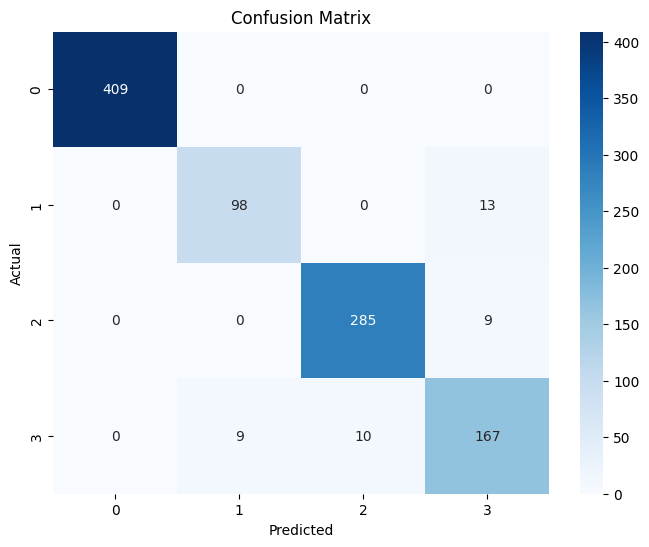

In [ ]:
# prompt: Classification , Objective : Predict categorical outcomes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Example classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_normalized is your final processed DataFrame
# Replace 'Air Quality' with the actual name of your target variable column
# 'target_column' was just a placeholder, you need to replace it with the real name of your target column.
# In your global variables, it appears your target column might be 'Air Quality'
X = df_normalized.drop('Air Quality', axis=1)
y = df_normalized['Air Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Initialize and train a classifier (example: RandomForestClassifier)
classifier = RandomForestClassifier(random_state=42) # You can change the classifier and its parameters
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Precision1: 0.9301873561052959
Recall1: 0.93
F1 score1: 0.9293316158960906


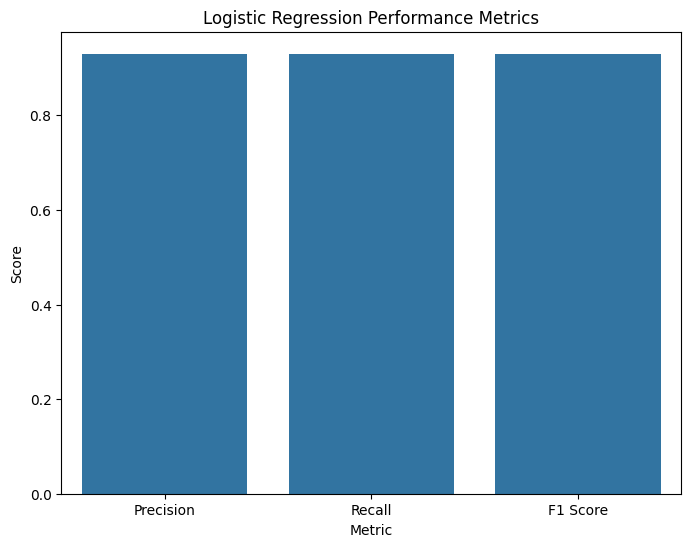

In [ ]:
# prompt: apply logistic regression on df and store precision in "Precision1" , recall in "Recall1" , F1 score in "F1 score1" and show graphically

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_normalized and X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize and train a Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
Precision1 = precision_score(y_test, y_pred_logreg, average='weighted') # Use weighted average
Recall1 = recall_score(y_test, y_pred_logreg, average='weighted')
F1_score1 = f1_score(y_test, y_pred_logreg, average='weighted')

print(f"Precision1: {Precision1}")
print(f"Recall1: {Recall1}")
print(f"F1 score1: {F1_score1}")


# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Value': [Precision1, Recall1, F1_score1]
})

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Value', data=results_df)
plt.title('Logistic Regression Performance Metrics')
plt.ylabel('Score')
plt.show()

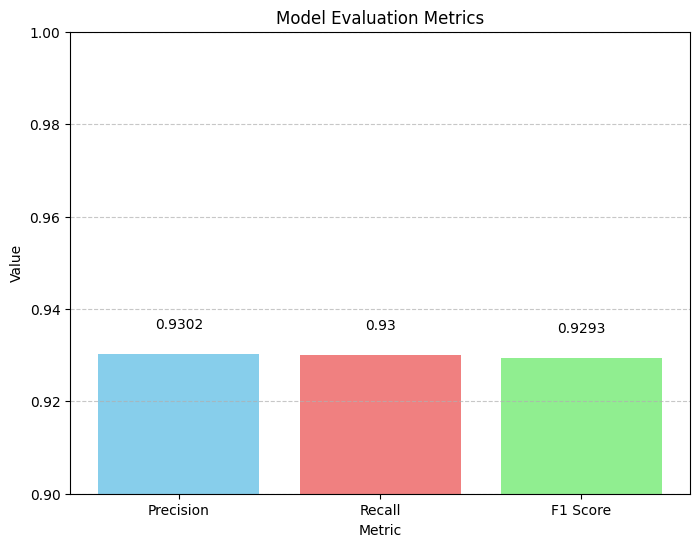

In [ ]:
# prompt: Precision1: 0.9301873561052959
# Recall1: 0.93
# F1 score1: 0.9293316158960906  show on graph

import matplotlib.pyplot as plt

# Data for the bar chart
metrics = ['Precision', 'Recall', 'F1 Score']
values = [0.9301873561052959, 0.93, 0.9293316158960906]

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(metrics, values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0.9, 1.0)  # Adjust y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid

# Add value labels above each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.005, str(round(v, 4)), ha='center', va='bottom') # Added rounding and vertical alignment

plt.show()

Logistic Regression Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       409
           1       0.90      0.77      0.83       111
           2       0.94      0.94      0.94       294
           3       0.82      0.85      0.83       186

    accuracy                           0.93      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.93      0.93      0.93      1000



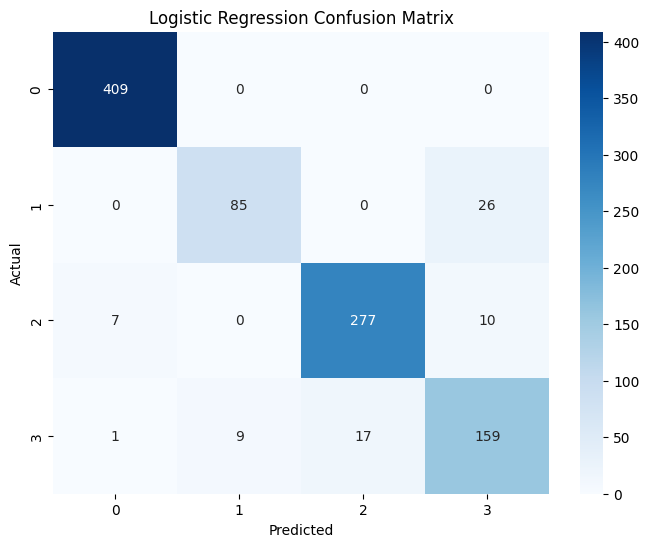

In [ ]:
# prompt: apply logistic regression on df

from sklearn.linear_model import LogisticRegression

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize and train a Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

# Print the classification report
print(classification_report(y_test, y_pred_logreg))

# Create and display the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Decision Tree Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       409
           1       0.76      0.86      0.81       111
           2       0.96      0.91      0.94       294
           3       0.80      0.80      0.80       186

    accuracy                           0.92      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.92      0.92      0.92      1000



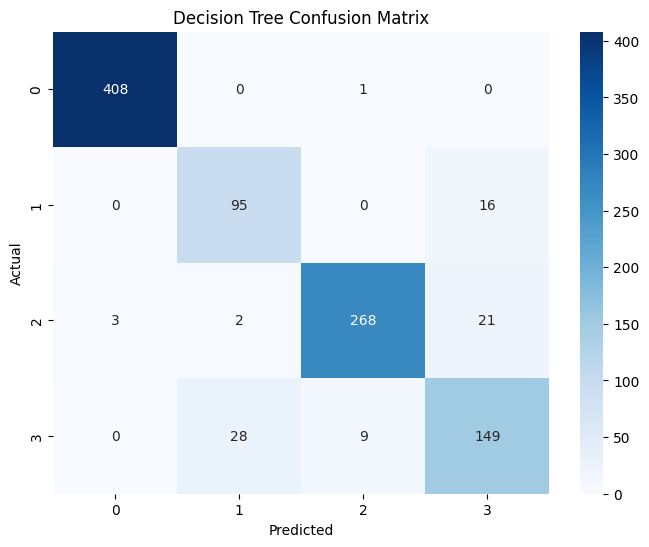

In [ ]:
# prompt: apply Decision Trees on df

from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize and train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42) # You can adjust hyperparameters here
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Print the classification report
print(classification_report(y_test, y_pred_dt))

# Create and display the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

KNN Accuracy: 0.933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.89      0.73      0.80       111
           2       0.94      0.97      0.95       294
           3       0.81      0.85      0.83       186

    accuracy                           0.93      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.93      0.93      0.93      1000



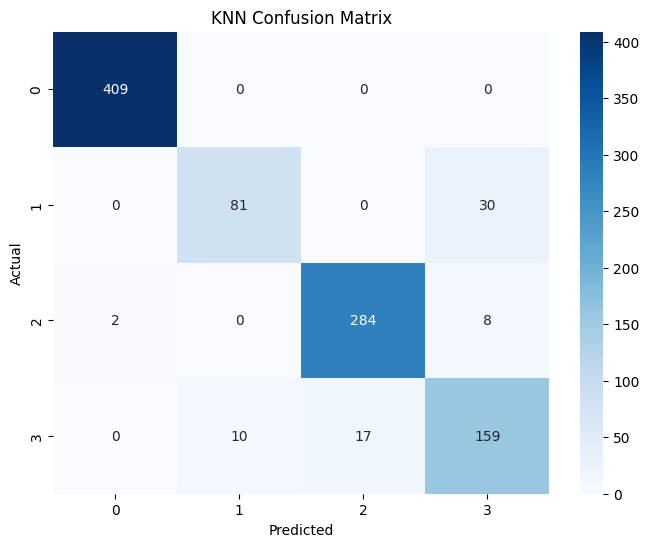

In [ ]:
# prompt: apply  KNN on df

from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize and train a KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

# Print the classification report
print(classification_report(y_test, y_pred_knn))

# Create and display the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

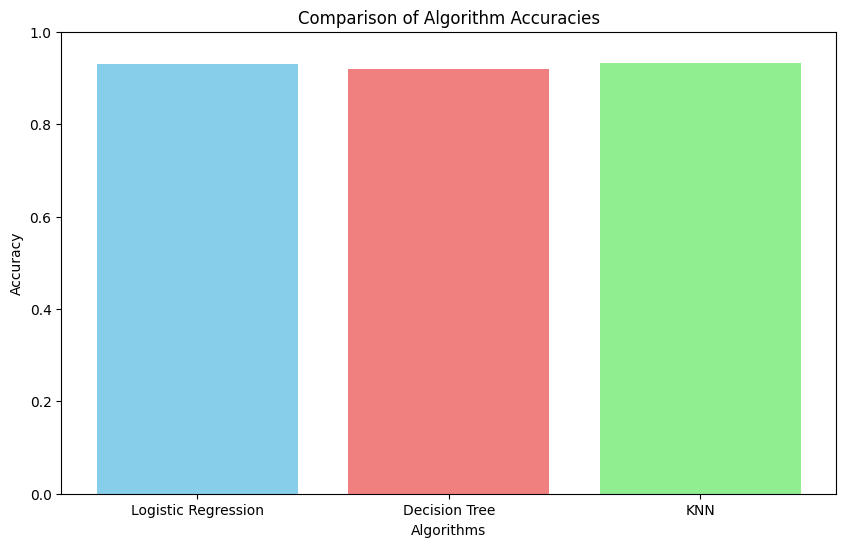

In [ ]:
# prompt: now graphically show all three algorithms Logistic regression, Decision tree and KNN

import matplotlib.pyplot as plt

# Assuming accuracy_logreg, accuracy_dt, accuracy_knn are defined from previous code cells

algorithms = ['Logistic Regression', 'Decision Tree', 'KNN']
accuracies = [accuracy_logreg, accuracy_dt, accuracy_knn]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Algorithm Accuracies")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()

Logistic Regression Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       409
           1       0.90      0.77      0.83       111
           2       0.94      0.94      0.94       294
           3       0.82      0.85      0.83       186

    accuracy                           0.93      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.93      0.93      0.93      1000



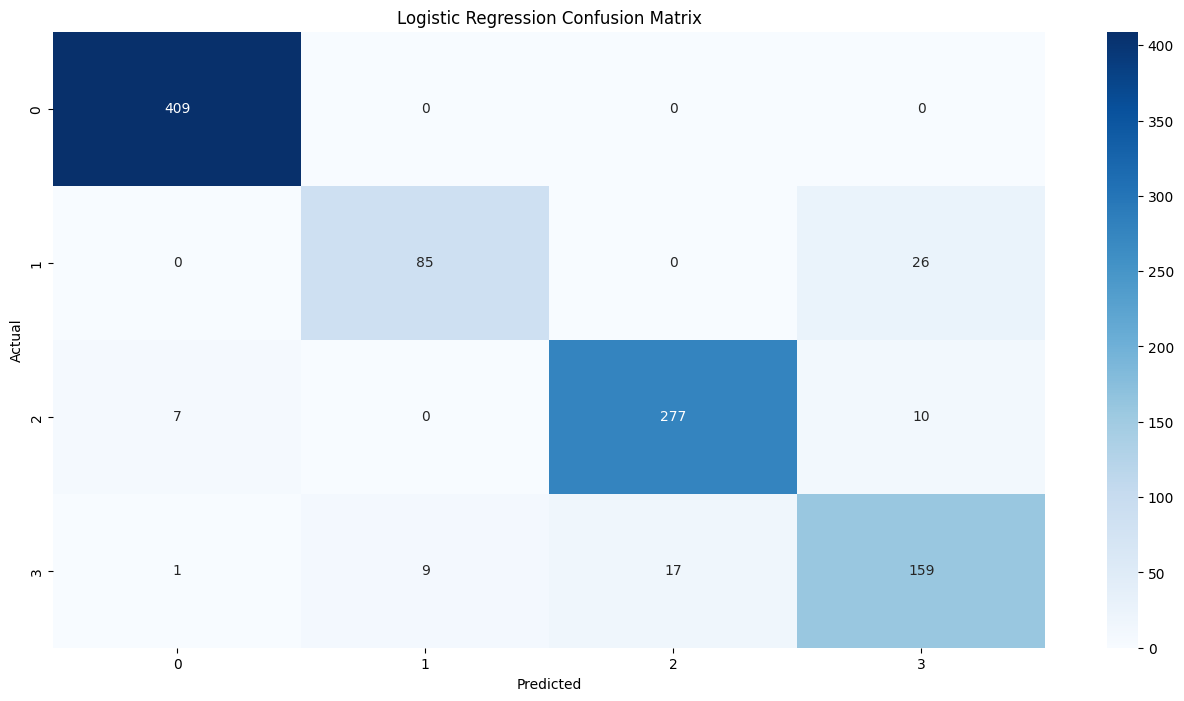

Decision Tree Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       409
           1       0.76      0.86      0.81       111
           2       0.96      0.91      0.94       294
           3       0.80      0.80      0.80       186

    accuracy                           0.92      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.92      0.92      0.92      1000



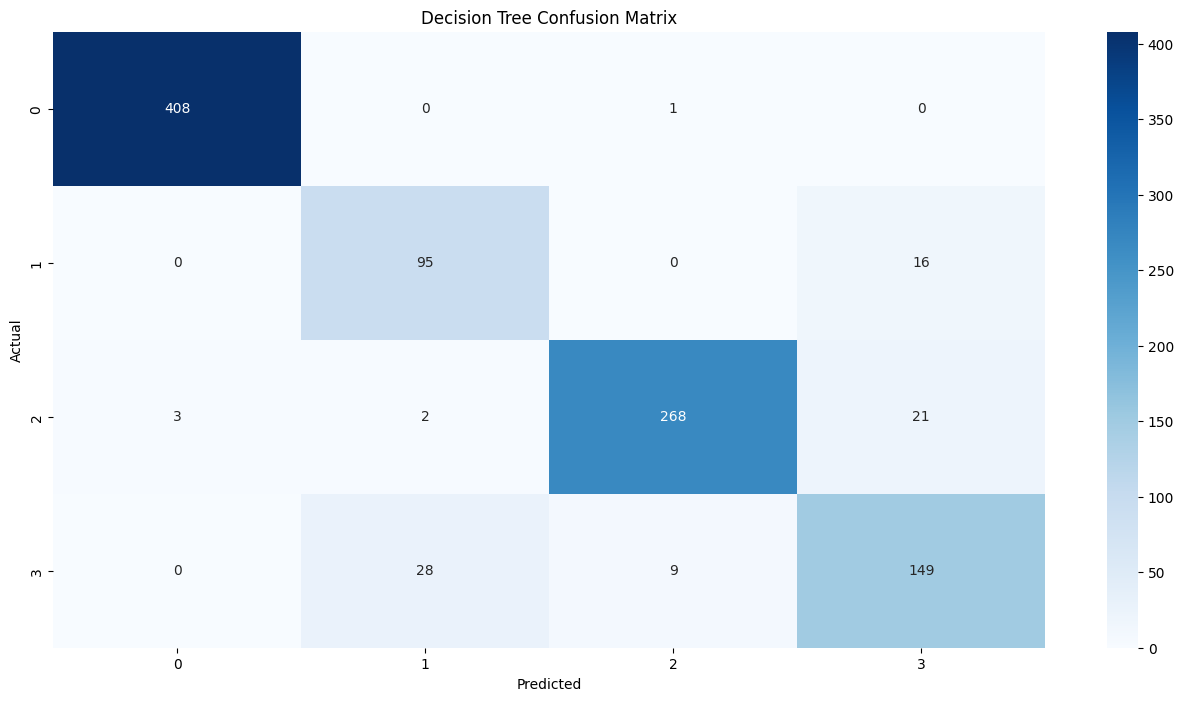

KNN Accuracy: 0.933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.89      0.73      0.80       111
           2       0.94      0.97      0.95       294
           3       0.81      0.85      0.83       186

    accuracy                           0.93      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.93      0.93      0.93      1000



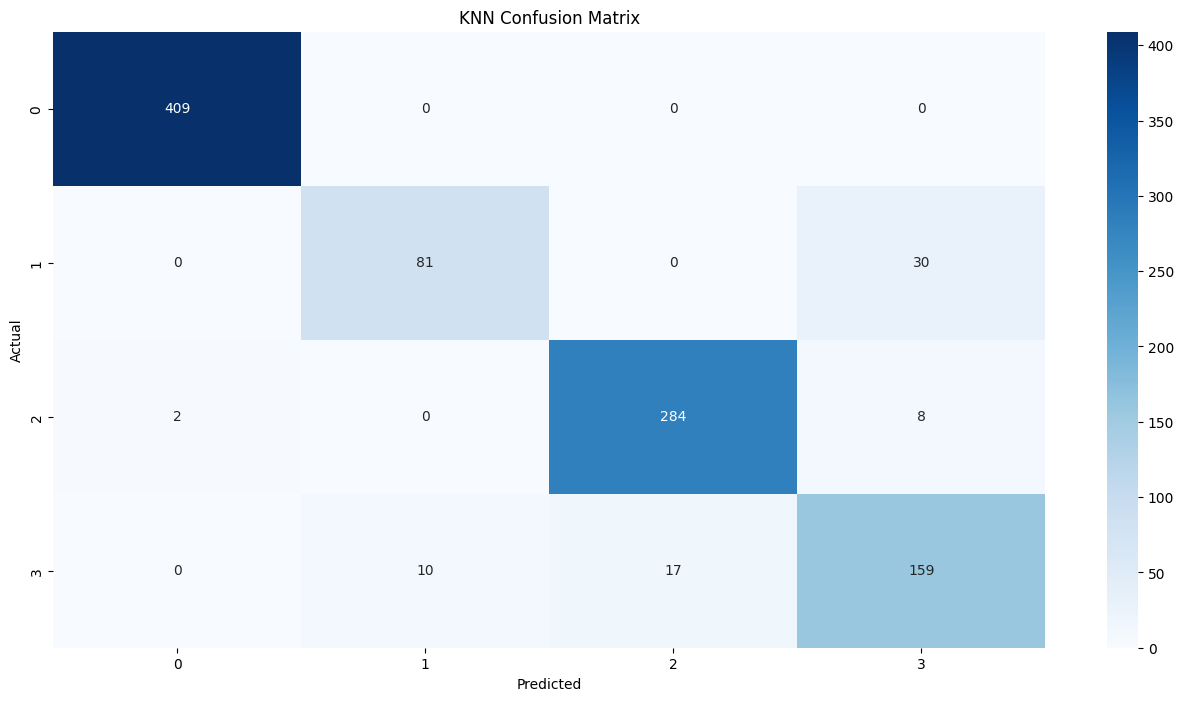

In [ ]:
# prompt: now apply  Evaluation Metrics like Accuracy on df  on all three algorithms KNN, Decision tree and Logistic regression

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code for data loading, preprocessing, etc.) ...


# Function to evaluate a model and print results
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(16, 8
                        ))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    return accuracy  # Return the accuracy


# Evaluate each model and store accuracies
accuracy_logreg = evaluate_model(LogisticRegression(random_state=42, max_iter=1000), "Logistic Regression")
accuracy_dt = evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree")
accuracy_knn = evaluate_model(KNeighborsClassifier(n_neighbors=5), "KNN")


# ... (rest of your existing code for plotting)

Logistic Regression Recall: 0.93
Decision Tree Recall: 0.92
KNN Recall: 0.933


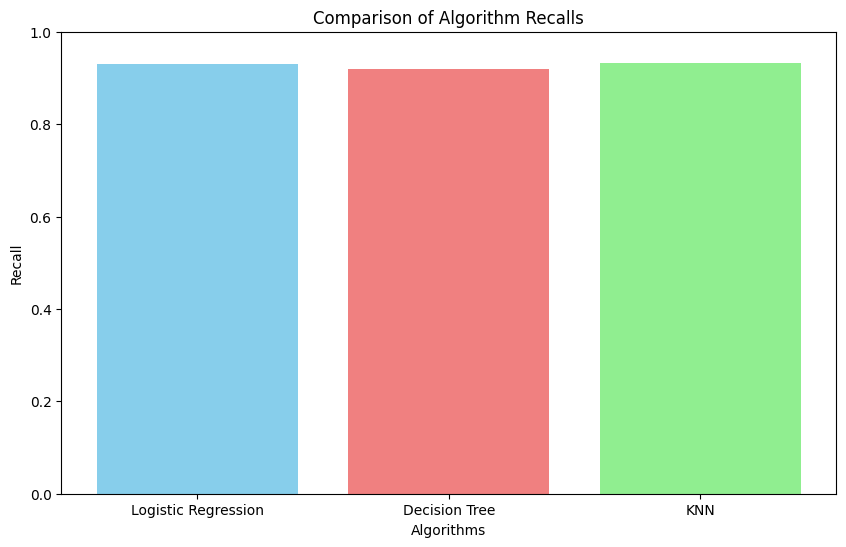

In [ ]:
# prompt: apply recall on df   on all three algorithms KNN, Decision tree and Logistic regression on bar graph

from sklearn.metrics import recall_score

# Assuming y_test and y_pred_logreg, y_pred_dt, y_pred_knn are defined from previous code cells

# Calculate recall for each model
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted') # Use 'weighted' for multi-class
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print(f"Logistic Regression Recall: {recall_logreg}")
print(f"Decision Tree Recall: {recall_dt}")
print(f"KNN Recall: {recall_knn}")

# Plot Recall
algorithms = ['Logistic Regression', 'Decision Tree', 'KNN']
recalls = [recall_logreg, recall_dt, recall_knn]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, recalls, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Algorithms")
plt.ylabel("Recall")
plt.title("Comparison of Algorithm Recalls")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for recall
plt.show()

In [ ]:
# prompt: apply recall on df

from sklearn.metrics import recall_score

# Assuming y_test and y_pred are already defined from your model's prediction
# Example: y_pred = classifier.predict(X_test)

# Calculate recall for each class
recall = recall_score(y_test, y_pred, average=None) #set average to None to get recall per class

print(f"Recall for each class: {recall}")

# Calculate the average recall (macro average)
macro_recall = recall_score(y_test, y_pred, average='macro')
print(f"Macro Average Recall: {macro_recall}")

# Calculate the weighted average recall
weighted_recall = recall_score(y_test, y_pred, average='weighted')
print(f"Weighted Average Recall: {weighted_recall}")

Recall for each class: [1.         0.88288288 0.96938776 0.89784946]
Macro Average Recall: 0.9375300250876287
Weighted Average Recall: 0.959


In [ ]:
# prompt: generate F1-score of df

from sklearn.metrics import f1_score

# Assuming y_test and y_pred are already defined from your model's prediction
# Example: y_pred = classifier.predict(X_test)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems
print(f"F1 Score: {f1}")

F1 Score: 0.9589782941698727


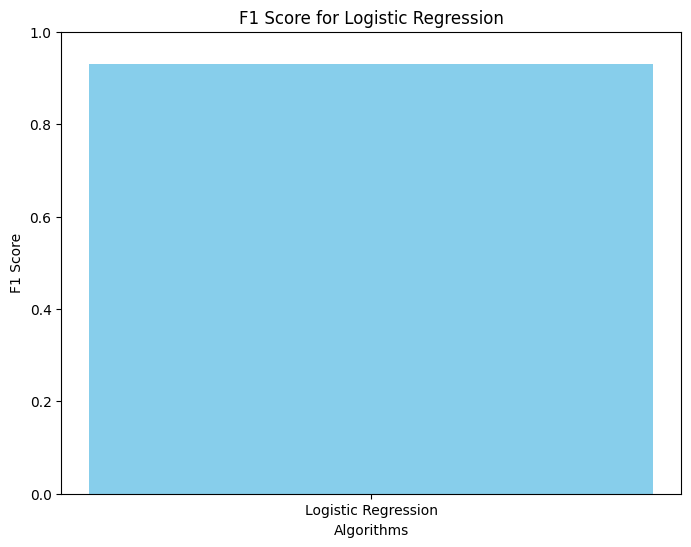

In [ ]:
# prompt: show generated F1 score of df on bar graph

import matplotlib.pyplot as plt

# Assuming y_test and y_pred_logreg are already defined from your model's prediction
# Example: y_pred_logreg = logreg_model.predict(X_test)

# Calculate the F1-score for Logistic Regression
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')  # Use 'weighted' for multi-class problems

# Data for the bar chart (replace with your actual values)
algorithms = ['Logistic Regression']
f1_scores = [f1_logreg]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(algorithms, f1_scores, color=['skyblue']) # You can change the color
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")
plt.title("F1 Score for Logistic Regression")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for F1 score
plt.show()

In [ ]:
# prompt: Generate ROC-AUC on df

from sklearn.metrics import roc_auc_score

# Assuming y_test and y_pred_proba are already defined
# y_pred_proba = classifier.predict_proba(X_test)

# Example using RandomForestClassifier (replace with your actual classifier and predictions)
y_pred_proba = classifier.predict_proba(X_test)

try:
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr') # 'ovr' for one-vs-rest
    print(f"ROC AUC Score: {roc_auc}")
except ValueError as e:
    print(f"Error calculating ROC AUC: {e}")
    print("Check if your target variable is binary or if predict_proba is available for your model.")

ROC AUC Score: 0.995310596047865


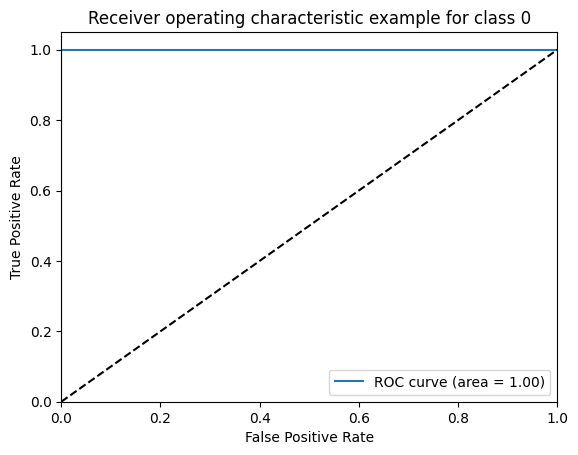

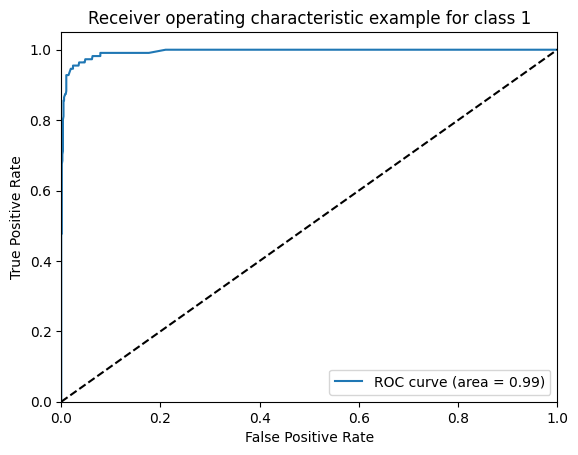

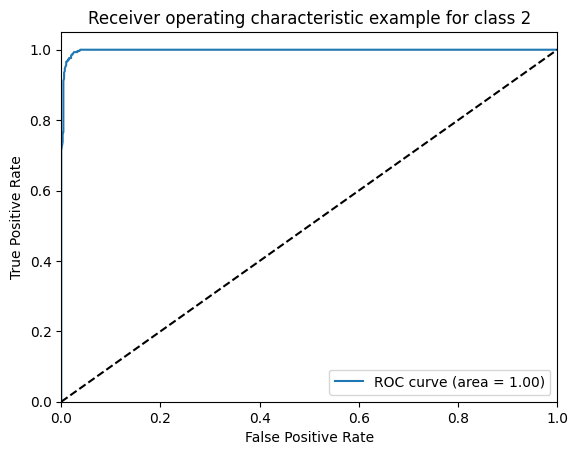

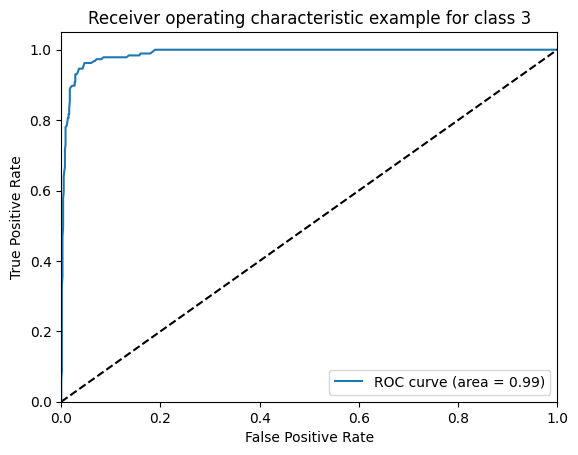

In [ ]:
# prompt: show generated ROC-AUC on confusion matrix showing  TPR AND FPR

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred_proba are defined from your model's predict_proba
# Example using RandomForestClassifier (replace with your actual classifier and predictions)
# y_pred_proba = classifier.predict_proba(X_test)

# Assuming 'classifier' and 'X_test' are defined from your model
try:
  y_pred_proba = classifier.predict_proba(X_test)
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  n_classes = len(set(y_test)) # Get the number of classes dynamically
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
      roc_auc[i] = auc(fpr[i], tpr[i])
  # Plot of a ROC curve for a specific class
  for i in range(n_classes):
      plt.figure()
      plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title(f'Receiver operating characteristic example for class {i}')
      plt.legend(loc="lower right")
      plt.show()
except ValueError as e:
    print(f"Error calculating ROC AUC: {e}")
    print("Check if your target variable is binary or if predict_proba is available for your model.")